In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from PIL import Image
from random import sample
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as vgg_preprocess
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input as resnet_preprocess
from tensorflow.keras.applications.xception import Xception, preprocess_input as xception_preprocess
from tensorflow.keras.models import Model
from pathlib import Path
Image.LOAD_TRUNCATED_IMAGES = True
import requests
                
from io import BytesIO
from tqdm.auto import tqdm
import os

In [3]:
# Read the data files
listing_data = pd.read_csv("/Users/ravitiwari/Projects/autoencoder-fashion-assignment/data/current_farfetch_listings.csv")

In [4]:
listing_data.head()

,Unnamed: 0,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,...,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.installmentsLabel,priceInfo.isOnSale,shortDescription,stockTotal
0,0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,...,SGD,NaN,1080,"$1,080","$1,080",1080,NaN,False,logo print strap sandals,130
1,1,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,...,SGD,20% Off,392,$392,$490,490,NaN,True,embroidered midi dress,14
2,2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,...,SGD,NaN,1245,"$1,245","$1,245",1245,NaN,False,FendiMania sock style sneakers,68
3,3,"[{'scaleId': 0, 'size': 'One Size'}]",49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,...,SGD,20% Off,308,$308,$385,385,NaN,True,top zip wallet,1
4,4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,...,SGD,NaN,1248,"$1,248","$1,248",1248,NaN,False,slingback 65 pumps,78


In [5]:
listing_data.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
listing_data.drop('priceInfo.installmentsLabel', axis=1, inplace=True)

In [7]:
# Check for % of null values
listing_data.isnull().sum() * 100 / listing_data.shape[0] 

availableSizes                     13.826086
brand.id                            0.000000
brand.name                          0.000000
gender                              0.000000
hasSimilarProducts                  0.000000
id                                  0.000000
images.cutOut                       0.000000
images.model                        0.000000
isCustomizable                      0.000000
merchandiseLabel                   70.108094
merchandiseLabelField               0.000000
merchantId                          0.000000
priceInfo.currencyCode              0.000000
priceInfo.discountLabel            63.834295
priceInfo.finalPrice                0.000000
priceInfo.formattedFinalPrice       0.000000
priceInfo.formattedInitialPrice     0.000000
priceInfo.initialPrice              0.000000
priceInfo.isOnSale                  0.000000
shortDescription                    0.000000
stockTotal                          0.000000
dtype: float64

In [8]:
# Analyse the null variables
listing_data[~listing_data['merchandiseLabel'].isnull()].head()

,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabel,...,merchantId,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
9,"[{'scaleId': 0, 'size': 'XXS'}, {'scaleId': 0,...",1504165,Rejina Pyo,women,True,13777585,https://cdn-images.farfetch-contents.com/13/77...,https://cdn-images.farfetch-contents.com/13/77...,False,New Season,...,9359,SGD,NaN,989,$989,$989,989,False,Blake herringbone midi dress,16
11,"[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, ...",2747,Chloé,women,True,13704528,https://cdn-images.farfetch-contents.com/13/70...,https://cdn-images.farfetch-contents.com/13/70...,False,New Season,...,9359,SGD,NaN,1790,"$1,790","$1,790",1790,False,pussy-bow rose-jacquard blouse,14
13,"[{'scaleId': 0, 'size': 'L'}, {'scaleId': 0, '...",168996,Pleats Please By Issey Miyake,women,True,14107224,https://cdn-images.farfetch-contents.com/14/10...,https://cdn-images.farfetch-contents.com/14/10...,False,New Season,...,9359,SGD,NaN,657,$657,$657,657,False,pleated midi dress,13
15,NaN,769627,Burberry,women,True,13970008,https://cdn-images.farfetch-contents.com/13/97...,https://cdn-images.farfetch-contents.com/13/97...,False,New Season,...,9359,SGD,NaN,1000,"$1,000","$1,000",1000,False,Margrette 50mm cow print pumps,10
18,"[{'scaleId': 0, 'size': 'XS'}, {'scaleId': 0, ...",2765,Alexander McQueen,women,True,13951735,https://cdn-images.farfetch-contents.com/13/95...,https://cdn-images.farfetch-contents.com/13/95...,False,New Season,...,9359,SGD,NaN,3330,"$3,330","$3,330",3330,False,tie-neck houndstooth midi-dress,2


In [9]:
# Check for the categories in merchandiseLabel
listing_data['merchandiseLabel'].value_counts()

merchandiseLabel
New Season              41469
Positively Conscious    12324
Permanent Collection     1275
Seasonal Pick             741
Exclusive                 632
Name: count, dtype: int64

In [10]:
# Drop the column merchandiseLabel
listing_data.drop('merchandiseLabel', axis=1, inplace=True)

In [11]:
# Analysing priceInfo.discountLabel
listing_data[listing_data['priceInfo.discountLabel'].isnull()].head()

,availableSizes,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,priceInfo.currencyCode,priceInfo.discountLabel,priceInfo.finalPrice,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal
0,NaN,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NoTag,9359,SGD,NaN,1080,"$1,080","$1,080",1080,False,logo print strap sandals,130
2,NaN,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NoTag,9140,SGD,NaN,1245,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68
4,NaN,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,SGD,NaN,1248,"$1,248","$1,248",1248,False,slingback 65 pumps,78
6,"[{'scaleId': 0, 'size': 'One Size'}]",25354,Gucci,women,True,12562558,https://cdn-images.farfetch-contents.com/12/56...,https://cdn-images.farfetch-contents.com/12/56...,False,NoTag,10952,SGD,NaN,3740,"$3,740","$3,740",3740,False,Green Dionysus GG small velvet shoulder bag,61
7,"[{'scaleId': 0, 'size': 'One Size'}]",1025204,MCM,women,True,13768073,https://cdn-images.farfetch-contents.com/13/76...,https://cdn-images.farfetch-contents.com/13/76...,False,NoTag,9913,SGD,NaN,1323,"$1,323","$1,323",1323,False,logo print satchel,5


In [12]:
# fill the null values in priceInfo.discountLabel with 0
listing_data['priceInfo.discountLabel'] = listing_data['priceInfo.discountLabel'].fillna(0)

In [13]:
# drop the size column
listing_data.drop('availableSizes', axis=1, inplace=True)

In [14]:
# Check for null values again
listing_data.isnull().sum()

brand.id                           0
brand.name                         0
gender                             0
hasSimilarProducts                 0
id                                 0
images.cutOut                      0
images.model                       0
isCustomizable                     0
merchandiseLabelField              0
merchantId                         0
priceInfo.currencyCode             0
priceInfo.discountLabel            0
priceInfo.finalPrice               0
priceInfo.formattedFinalPrice      0
priceInfo.formattedInitialPrice    0
priceInfo.initialPrice             0
priceInfo.isOnSale                 0
shortDescription                   0
stockTotal                         0
dtype: int64

In [15]:
def assign_product_category(description):
    label = list(description.split())[-1].lower()
    
    return label
listing_data['product_category']=listing_data["shortDescription"].map(lambda x: assign_product_category(x))

In [18]:
# Extracting the Image 
def load_images():
    
    # Store the directory path in a varaible
    cutout_img_dir = "/Users/ravitiwari/Projects/autoencoder-fashion-assignment/data/cutout"
    model_img_dir = "/Users/ravitiwari/Projects/autoencoder-fashion-assignment/data/model"
    
    # list the images in these directories
    cutout_images = os.listdir(cutout_img_dir)
    model_images = os.listdir(model_img_dir)
    
    # load 10 Random Cutout Images: Sample out 10 images randomly from the above list
    sample_cutout_images = sample(cutout_images,10)
    fig = plt.figure(figsize=(10, 5))
    
    print("==============Cutout Images==============")
    for i, img_name in enumerate(sample_cutout_images):
        plt.subplot(2, 5, i+1)
        img_path = os.path.join(cutout_img_dir, img_name)
        loaded_img = image.load_img(img_path)
        img_array = image.img_to_array(loaded_img, dtype='int')
        plt.imshow(img_array)
        plt.axis('off')
        
    plt.show()
    print()
    # load 10 Random Model Images: Sample out 10 images randomly from the above list
    sample_model_images = sample(model_images,10)
    fig = plt.figure(figsize=(10,5))
    
    print("==============Model Images==============")
    for i, img_name in enumerate(sample_model_images):
        plt.subplot(2, 5, i+1)
        img_path = os.path.join(model_img_dir, img_name)
        loaded_img = image.load_img(img_path)
        img_array = image.img_to_array(loaded_img, dtype='int')
        plt.imshow(img_array)
        plt.axis('off')
        
    plt.show()

==============Cutout Images==============


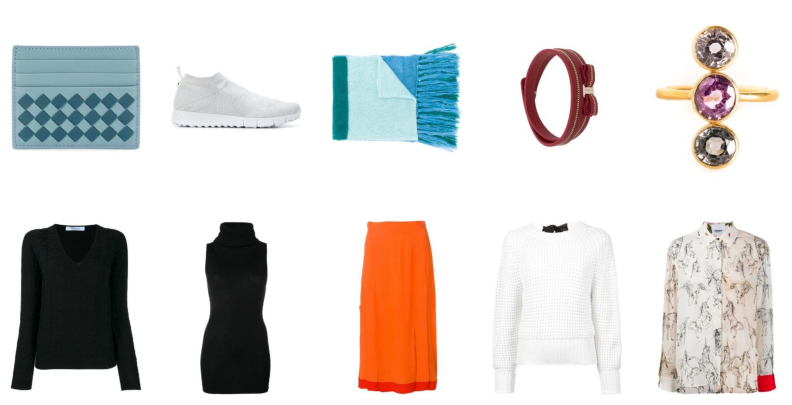


==============Model Images==============


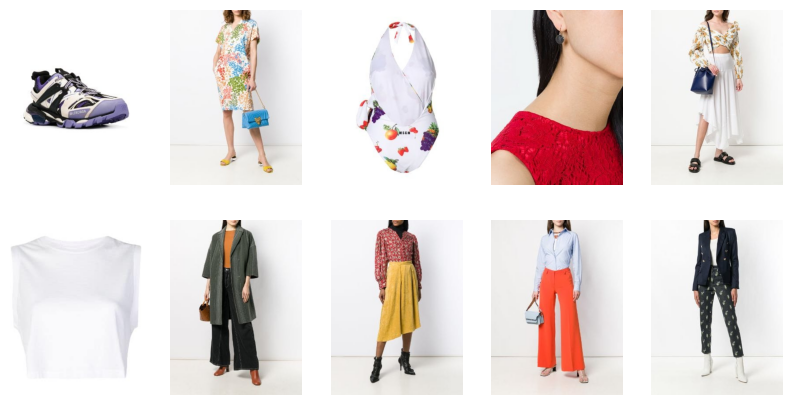

In [19]:
load_images()

In [20]:
# Join the images with path and add in the dataframe

# Store the directory path in a varaible
cutout_img_dir = "/Users/ravitiwari/Projects/autoencoder-fashion-assignment/data/cutout"
model_img_dir = "/Users/ravitiwari/Projects/autoencoder-fashion-assignment/data/model"

# list the directories
cutout_images = os.listdir(cutout_img_dir)
model_images = os.listdir(model_img_dir)

In [21]:
def extractImageName(x):
    
    # 1. Invert the image path
    x_inv = x[ :: -1]
    
    # 2. Find the index of '/'
    slash_idx = x_inv.find('/')
    
    # 3. Extract the text after the -slash_idx
    return x[-slash_idx : ] 

listing_data['cutOutimageNames'] = listing_data['images.cutOut'].apply(lambda x : extractImageName(x))
listing_data['modelimageNames'] = listing_data['images.model'].apply(lambda x : extractImageName(x))

In [22]:
# Extract only those data points for which we have images
listing_data = listing_data[listing_data['cutOutimageNames'].isin(cutout_images)]
listing_data = listing_data[listing_data['modelimageNames'].isin(model_images)]

In [23]:
# Reset the index
listing_data.reset_index(drop=True, inplace=True)

In [24]:
# Add entire paths to cutOut and modelImages
listing_data['cutOutImages_path'] = cutout_img_dir + '/' + listing_data['cutOutimageNames']
listing_data['modelImages_path'] = model_img_dir + '/' + listing_data['modelimageNames']

In [25]:
# Drop the cutOutimageNames, cutOutimageNames
listing_data.drop(['cutOutimageNames', 'cutOutimageNames'], axis=1, inplace=True)

The images show a mixed-print flared trousers
Price: $667
Brand: Osklen



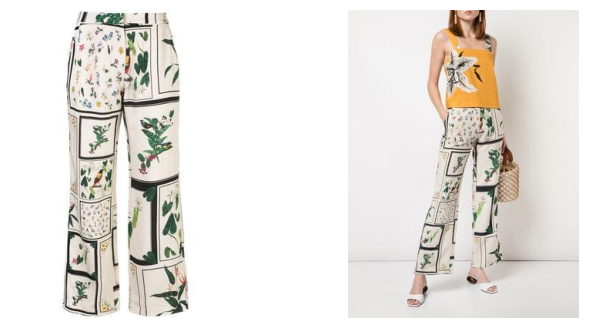

In [26]:
# Plot the images along with product descriptions, price and brand
random_idx = np.random.randint(low = 0, high = listing_data.shape[0] - 1)
cutOut_img_path = listing_data.iloc[random_idx]['cutOutImages_path']
model_img_path = listing_data.iloc[random_idx]['modelImages_path']
price = listing_data.iloc[random_idx]['priceInfo.formattedFinalPrice']
desc = listing_data.iloc[random_idx]['shortDescription']
brand = listing_data.iloc[random_idx]['brand.name']

# Load the images
cutOut_img = image.load_img(cutOut_img_path)
cutOut_img_arr = image.img_to_array(cutOut_img, dtype='int')
model_img = image.load_img(model_img_path)
model_img_arr = image.img_to_array(model_img, dtype='int')

# Plot the images
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
print("The images show a {}".format(desc))
print("Price: {}".format(price))
print("Brand: {}".format(brand))
print()
ax[0].imshow(cutOut_img_arr)
ax[1].imshow(model_img_arr)
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [27]:
print(listing_data['product_category'].value_counts())

product_category
dress          18999
bag            15561
trousers        9302
top             8296
sunglasses      7148
               ...  
neckring           1
bloomers           1
lr-090/cb          1
lr-089/cb          1
breastplate        1
Name: count, Length: 1683, dtype: int64


In [28]:
my_dict=dict()
for label in listing_data["product_category"]:
    try:
        my_dict[label]+=1
    except:
        my_dict[label]=1
choosen_category=[]
for key in my_dict.keys():
    if my_dict[key]>=100:
        choosen_category.append(key)

In [29]:
sub_listing_data=listing_data[listing_data['product_category'].isin(choosen_category)]
sub_listing_data

,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,...,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal,product_category,modelimageNames,cutOutImages_path,modelImages_path
0,8360,Miu Miu,women,True,13415450,https://cdn-images.farfetch-contents.com/13/41...,https://cdn-images.farfetch-contents.com/13/41...,False,NoTag,9359,...,"$1,080","$1,080",1080,False,logo print strap sandals,130,sandals,13415450_17798961_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
1,2049368,Self-Portrait,women,True,13784566,https://cdn-images.farfetch-contents.com/13/78...,https://cdn-images.farfetch-contents.com/13/78...,False,NoTag,9319,...,$392,$490,490,True,embroidered midi dress,14,dress,13784566_17127308_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
2,15514,Fendi,women,True,13377441,https://cdn-images.farfetch-contents.com/13/37...,https://cdn-images.farfetch-contents.com/13/37...,False,NoTag,9140,...,"$1,245","$1,245",1245,False,FendiMania sock style sneakers,68,sneakers,13377441_15308566_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
3,49486,A.P.C.,women,False,13744082,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NoTag,9031,...,$308,$385,385,True,top zip wallet,1,wallet,13744082_16970244_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
4,34624,Prada,women,True,13668256,https://cdn-images.farfetch-contents.com/13/66...,https://cdn-images.farfetch-contents.com/13/66...,False,NoTag,9339,...,"$1,248","$1,248",1248,False,slingback 65 pumps,78,pumps,13668256_16606027_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188812,59394,Fornasetti,unisex,False,10047577,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,face print plate,6,plate,10047577_262115_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
188813,59394,Fornasetti,unisex,False,10047571,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,boss print plate,2,plate,10047571_262109_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
188814,59394,Fornasetti,unisex,False,10047569,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,face print plate,2,plate,10047569_262103_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...
188815,59394,Fornasetti,unisex,False,10047567,https://cdn-images.farfetch-contents.com/10/04...,https://cdn-images.farfetch-contents.com/10/04...,False,NoTag,9089,...,$207,$207,207,False,whisker print plate,10,plate,10047567_262100_300.jpg,/Users/ravitiwari/Projects/autoencoder-fashion...,/Users/ravitiwari/Projects/autoencoder-fashion...


In [30]:
sub_listing_data.product_category.value_counts()

product_category
dress         18999
bag           15561
trousers       9302
top            8296
sunglasses     7148
              ...  
camisole        107
detail          107
hoops           105
glass           104
poncho          103
Name: count, Length: 100, dtype: int64

In [31]:
sub_listing_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180122 entries, 0 to 188816
Data columns (total 23 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   brand.id                         180122 non-null  int64 
 1   brand.name                       180122 non-null  object
 2   gender                           180122 non-null  object
 3   hasSimilarProducts               180122 non-null  bool  
 4   id                               180122 non-null  int64 
 5   images.cutOut                    180122 non-null  object
 6   images.model                     180122 non-null  object
 7   isCustomizable                   180122 non-null  bool  
 8   merchandiseLabelField            180122 non-null  object
 9   merchantId                       180122 non-null  int64 
 10  priceInfo.currencyCode           180122 non-null  object
 11  priceInfo.discountLabel          180122 non-null  object
 12  priceInfo.finalPrice 

In [34]:
# Step 1: Get the counts of each unique product_category
category_counts = sub_listing_data['product_category'].value_counts()

# Step 2: Filter categories with more than 5000 occurrences
valid_categories = category_counts[category_counts > 5000].index

# Step 3: Filter the original DataFrame by valid categories
filtered_df = sub_listing_data[sub_listing_data['product_category'].isin(valid_categories)]

# Show the resulting DataFrame
print(filtered_df.shape)

(91610, 23)


In [35]:
filtered_df.product_category.value_counts()

product_category
dress         18999
bag           15561
trousers       9302
top            8296
sunglasses     7148
skirt          7038
t-shirt        6790
sandals        6231
jacket         6205
sneakers       6040
Name: count, dtype: int64

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'df' is the filtered DataFrame that contains the product category and image paths

# Step 1: Define categories
clothes_categories = ['dress', 'top', 'skirt', 't-shirt', 'jacket', 'trousers']
accessory_categories = ['sunglasses', 'bag', 'sandals', 'sneakers']

# Step 2: Split the data into categories
clothes_df = filtered_df[filtered_df['product_category'].isin(clothes_categories)]
accessories_df = filtered_df[filtered_df['product_category'].isin(accessory_categories)]

# Step 3: Downsample accessories and upsample clothes
# For clothes, let's keep more samples, and for accessories, we'll reduce the number

# You can define the number of samples you want for each category in the datasets
clothes_target_size = 20000  # For training/validation, we want more clothes
accessory_target_size = 5000  # For training/validation, we want fewer accessories

# Upsample clothes
upsampled_clothes_df = clothes_df.sample(clothes_target_size, replace=True, random_state=42)

# Downsample accessories
downsampled_accessories_df = accessories_df.sample(accessory_target_size, replace=False, random_state=42)

# Step 4: Combine for training and validation
# For training, you can combine the upsampled clothes and downsampled accessories
train_data = pd.concat([upsampled_clothes_df, downsampled_accessories_df])

# Step 5: Create validation data
# You can perform a similar process for validation, making sure the distribution is similar to training
valid_clothes_df = clothes_df.sample(5000, replace=False, random_state=42)
valid_accessories_df = accessories_df.sample(1500, replace=False, random_state=42)

validation_data = pd.concat([valid_clothes_df, valid_accessories_df])

# Step 6: Create the database dataset (with a total of around 15,000 images)
# We'll have more clothes and fewer accessories in the database
db_clothes_df = clothes_df.sample(10000, replace=False, random_state=42)
db_accessories_df = accessories_df.sample(5000, replace=False, random_state=42)

database_data = pd.concat([db_clothes_df, db_accessories_df])

# Step 7: Create the test dataset (with a similar distribution to the database)
test_clothes_df = clothes_df.sample(5000, replace=False, random_state=42)
test_accessories_df = accessories_df.sample(2500, replace=False, random_state=42)

test_data = pd.concat([test_clothes_df, test_accessories_df])

# Step 8: Check the distribution and shapes
print("Training data distribution:")
print(train_data.shape)
print(train_data['product_category'].value_counts())

print("Validation data distribution:")
print(validation_data.shape)
print(validation_data['product_category'].value_counts())

print("Database data distribution:")
print(database_data.shape)
print(database_data['product_category'].value_counts())

print("Test data distribution:")
print(test_data.shape)
print(test_data['product_category'].value_counts())

# Step 9: Optionally, save the datasets to CSV or pickled files for further processing
train_data.to_csv('data/train_data.csv', index=False)
validation_data.to_csv('data/validation_data.csv', index=False)
database_data.to_csv('data/database_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)


Training data distribution:
(25000, 23)
product_category
dress         6752
trousers      3361
top           2903
skirt         2392
t-shirt       2366
jacket        2226
bag           2211
sunglasses    1044
sandals        930
sneakers       815
Name: count, dtype: int64
Validation data distribution:
(6500, 23)
product_category
dress         1711
trousers       794
top            728
bag            653
skirt          618
jacket         590
t-shirt        559
sunglasses     313
sandals        272
sneakers       262
Name: count, dtype: int64
Database data distribution:
(15000, 23)
product_category
dress         3433
bag           2211
trousers      1599
top           1446
skirt         1258
t-shirt       1133
jacket        1131
sunglasses    1044
sandals        930
sneakers       815
Name: count, dtype: int64
Test data distribution:
(7500, 23)
product_category
dress         1711
bag           1075
trousers       794
top            728
skirt          618
jacket         590
t-shirt       

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
def create_datasets(df, train_size=10000, val_size=2000, db_size=15000, test_size=2000, random_state=42):
    """
    Splits the DataFrame into four datasets: training, validation, database, and testing.

    :param df: Input DataFrame.
    :param train_size: Number of images for training the encoder.
    :param val_size: Number of images for validation during training.
    :param db_size: Number of images for the feature database.
    :param test_size: Number of images for testing similarity search.
    :param random_state: Random seed for reproducibility.
    :return: Four DataFrames (train, validation, database, test).
    """
    # Shuffle the dataset before splitting
    df = df.sample(frac=1, random_state=random_state).reset_index(drop=True)

    # First split: train + val, and the rest
    train_val, rest = train_test_split(df, test_size=(len(df) - train_size - val_size) / len(df), random_state=random_state)

    # Further split train_val into train and validation
    train, val = train_test_split(train_val, test_size=val_size / (train_size + val_size), random_state=random_state)

    # Split the remaining dataset into database and test
    db_test, _ = train_test_split(rest, test_size=(len(rest) - db_size - test_size) / len(rest), random_state=random_state)
    db, test = train_test_split(db_test, test_size=test_size / (db_size + test_size), random_state=random_state)

    return train, val, db, test

# Load your DataFrame here (example: df = pd.read_csv("your_data.csv"))
# Assuming `df` is already loaded as per your description

# train, val, db, test = create_datasets(df)

# # Save or inspect the datasets
# train.to_csv("train_dataset.csv", index=False)
# val.to_csv("val_dataset.csv", index=False)
# db.to_csv("db_dataset.csv", index=False)
# test.to_csv("test_dataset.csv", index=False)

# print(f"Train Dataset: {len(train)} images")
# print(f"Validation Dataset: {len(val)} images")
# print(f"Database Dataset: {len(db)} images")
# print(f"Test Dataset: {len(test)} images")


In [32]:
train, val, db, test = create_datasets(sub_listing_data)

# Save or inspect the datasets
train.to_csv("data/autoencoder/train_dataset.csv", index=False)
val.to_csv("data/autoencoder/val_dataset.csv", index=False)
db.to_csv("data/autoencoder/db_dataset.csv", index=False)
test.to_csv("data/autoencoder/test_dataset.csv", index=False)

print(f"Train Dataset: {len(train)} images")
print(f"Validation Dataset: {len(val)} images")
print(f"Database Dataset: {len(db)} images")
print(f"Test Dataset: {len(test)} images")


Train Dataset: 10000 images
Validation Dataset: 2000 images
Database Dataset: 15000 images
Test Dataset: 2000 images


In [33]:
train.iloc[0]['images.cutOut']

'https://cdn-images.farfetch-contents.com/13/84/90/47/13849047_17455934_300.jpg'

In [2]:
import pandas as pd

train = pd.read_csv("data/autoencoder/train_dataset.csv")
val = pd.read_csv("data/autoencoder/val_dataset.csv")
db = pd.read_csv("data/autoencoder/db_dataset.csv")
test = pd.read_csv("data/autoencoder/test_dataset.csv")

In [3]:
train

,brand.id,brand.name,gender,hasSimilarProducts,id,images.cutOut,images.model,isCustomizable,merchandiseLabelField,merchantId,...,priceInfo.formattedFinalPrice,priceInfo.formattedInitialPrice,priceInfo.initialPrice,priceInfo.isOnSale,shortDescription,stockTotal,product_category,modelimageNames,cutOutImages_path,modelImages_path
0,6709379,Nasaseasons,women,False,13849047,https://cdn-images.farfetch-contents.com/13/84...,https://cdn-images.farfetch-contents.com/13/84...,False,NoTag,10046,...,$106,$133,133,True,Hard to Get baseball cap,5,cap,13849047_17455937_300.jpg,data/cutout/13849047_17455934_300.jpg,data/model/13849047_17455937_300.jpg
1,21103,Gianvito Rossi,women,True,13641394,https://cdn-images.farfetch-contents.com/13/64...,https://cdn-images.farfetch-contents.com/13/64...,False,NoTag,9270,...,"$1,200","$1,200",1200,False,Poppy sandals,7,sandals,13641394_16685579_300.jpg,data/cutout/13641394_16685577_300.jpg,data/model/13641394_16685579_300.jpg
2,10343184,Reina Olga,women,True,14038039,https://cdn-images.farfetch-contents.com/14/03...,https://cdn-images.farfetch-contents.com/14/03...,False,NoTag,9336,...,$79,$105,105,True,Reversible leopard print bikini top,4,top,14038039_18314097_300.jpg,data/cutout/14038039_18314094_300.jpg,data/model/14038039_18314097_300.jpg
3,789795,Escada,women,True,13754774,https://cdn-images.farfetch-contents.com/13/75...,https://cdn-images.farfetch-contents.com/13/75...,False,NoTag,11958,...,$383,$765,765,True,Pug low-top sneakers,3,sneakers,13754774_17126644_300.jpg,data/cutout/13754774_17126643_300.jpg,data/model/13754774_17126644_300.jpg
4,6908,Zanone,women,True,13746597,https://cdn-images.farfetch-contents.com/13/74...,https://cdn-images.farfetch-contents.com/13/74...,False,NoTag,9032,...,$307,$511,511,True,classic cardigan,1,cardigan,13746597_16923791_300.jpg,data/cutout/13746597_16923789_300.jpg,data/model/13746597_16923791_300.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,20420,Joseph,women,True,13577449,https://cdn-images.farfetch-contents.com/13/57...,https://cdn-images.farfetch-contents.com/13/57...,False,NoTag,9525,...,$326,$466,466,True,fitted midi skirt,2,skirt,13577449_16163838_300.jpg,data/cutout/13577449_16163831_300.jpg,data/model/13577449_16163838_300.jpg
9996,330188,Fabiana Filippi,women,True,13447319,https://cdn-images.farfetch-contents.com/13/44...,https://cdn-images.farfetch-contents.com/13/44...,False,NoTag,11776,...,"$1,367","$1,367",1367,False,hooded raincoat,1,raincoat,13447319_15680877_300.jpg,data/cutout/13447319_15680871_300.jpg,data/model/13447319_15680877_300.jpg
9997,11131,T By Alexander Wang,women,True,13574301,https://cdn-images.farfetch-contents.com/13/57...,https://cdn-images.farfetch-contents.com/13/57...,False,NoTag,9058,...,$437,$624,624,True,cropped ribbed knit top,2,top,13574301_16318251_300.jpg,data/cutout/13574301_16318248_300.jpg,data/model/13574301_16318251_300.jpg
9998,10533,Valentino,women,True,13007147,https://cdn-images.farfetch-contents.com/13/00...,https://cdn-images.farfetch-contents.com/13/00...,False,NoTag,10952,...,"$2,700","$2,700",2700,False,Valentino Garavani Rockstud Spike shoulder bag,4,bag,13007147_13763688_300.jpg,data/cutout/13007147_13763682_300.jpg,data/model/13007147_13763688_300.jpg


In [5]:
import os

os.mkdir("data/images/train")

In [10]:
rt = train.iloc[0]['cutOutImages_path']
rt

'data/cutout/13849047_17455934_300.jpg'

In [11]:
os.path.split(rt)

('data/cutout', '13849047_17455934_300.jpg')

In [16]:
import shutil
import os
from tqdm.auto import tqdm
def copy_image(source_path, target_path):
    try:
        # Check if the source file exists
        if not os.path.exists(source_path):
            print(f"Source file {source_path} does not exist.")
            return
        
        # Create target directory if it doesn't exist
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        
        # Copy the image
        shutil.copy(source_path, target_path)
        # print(f"Image successfully copied to {target_path}")
    
    except Exception as e:
        print(f"Error copying image: {e}")

# Example usage
# source_image = "path/to/source/image.jpg"
# target_image = "path/to/target/image.jpg"
# copy_image(source_image, target_image)


In [14]:
path = "data/images/train"

In [15]:
for i in tqdm(range(len(train))):
    image_source_path = train.iloc[i]['cutOutImages_path']
    dest_path = os.path.join(path, os.path.split(image_source_path)[-1])
    copy_image(image_source_path, dest_path)

  0%|          | 0/10000 [00:00<?, ?it/s]

Image successfully copied to data/images/train/13849047_17455934_300.jpg
Image successfully copied to data/images/train/13641394_16685577_300.jpg
Image successfully copied to data/images/train/14038039_18314094_300.jpg
Image successfully copied to data/images/train/13754774_17126643_300.jpg
Image successfully copied to data/images/train/13746597_16923789_300.jpg
Image successfully copied to data/images/train/13538855_16288174_300.jpg
Image successfully copied to data/images/train/13549420_16061134_300.jpg
Image successfully copied to data/images/train/13710732_16986195_300.jpg
Image successfully copied to data/images/train/14245885_20190583_300.jpg
Image successfully copied to data/images/train/14191855_20060649_300.jpg
Image successfully copied to data/images/train/13416938_16198652_300.jpg
Image successfully copied to data/images/train/13515583_15946828_300.jpg
Image successfully copied to data/images/train/13154128_14649570_300.jpg
Image successfully copied to data/images/train/1410

In [17]:
path = "data/images/test"
os.mkdir("data/images/test")

for i in tqdm(range(len(test))):
    image_source_path = test.iloc[i]['cutOutImages_path']
    dest_path = os.path.join(path, os.path.split(image_source_path)[-1])
    copy_image(image_source_path, dest_path)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [18]:
path = "data/images/val"
os.mkdir("data/images/val")

for i in tqdm(range(len(val))):
    image_source_path = val.iloc[i]['cutOutImages_path']
    dest_path = os.path.join(path, os.path.split(image_source_path)[-1])
    copy_image(image_source_path, dest_path)

  0%|          | 0/2000 [00:00<?, ?it/s]

In [19]:
path = "data/images/db"
os.mkdir("data/images/db")

for i in tqdm(range(len(db))):
    image_source_path = db.iloc[i]['cutOutImages_path']
    dest_path = os.path.join(path, os.path.split(image_source_path)[-1])
    copy_image(image_source_path, dest_path)

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
!pip install skl